In [11]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://bit.ly/perch_csv_data')

In [5]:
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [7]:
perch_full = df.to_numpy() # 넘파이 배열로 바꾸기

In [9]:
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [13]:
# 타깃 데이터
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly = PolynomialFeatures(include_bias = False) # 사이킷런의 선형 모델은 자동으로 절편을 추가하기 때문에 특성에서 절편(1) 빼기

In [35]:
poly.fit(train_input)

PolynomialFeatures(include_bias=False)

In [41]:
train_poly = poly.transform(train_input)
train_poly.shape # 9개의 특성

(42, 9)

In [43]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [47]:
test_poly = poly.transform(test_input)

In [51]:
from sklearn.linear_model import LinearRegression

In [53]:
# 선형 회귀 모델로 학습
lr = LinearRegression()

In [55]:
lr.fit(train_poly, train_target)

LinearRegression()

In [57]:
lr.score(train_poly, train_target)

0.9903183436982125

In [59]:
lr.score(test_poly, test_target)

0.9714559911594155

In [61]:
poly = PolynomialFeatures(degree = 5, include_bias = False) # 5제곱까지 특성으로 넣기

In [63]:
poly.fit(train_input)

PolynomialFeatures(degree=5, include_bias=False)

In [65]:
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [67]:
train_poly.shape

(42, 55)

In [69]:
lr = LinearRegression()

In [71]:
lr.fit(train_poly, train_target)

LinearRegression()

In [73]:
lr.score(train_poly, train_target)

0.9999999999938143

In [77]:
lr.score(test_poly, test_target) # 과대적합

-144.40744532797535

## 과대적합을 피하기 위한 규제 -> 특성에 곱해지는 계수(기울기)의 크기를 작게 만들기

In [80]:
from sklearn.preprocessing import StandardScaler

In [82]:
# 정규화
ss = StandardScaler()

In [84]:
ss.fit(train_poly)

StandardScaler()

In [88]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#### 릿지 회귀

In [92]:
from sklearn.linear_model import Ridge

In [94]:
ridge = Ridge()

In [96]:
ridge.fit(train_scaled, train_target)

Ridge()

In [98]:
ridge.score(train_scaled, train_target)

0.9896101671037343

In [100]:
ridge.score(test_scaled, test_target)

0.9790693977615386

In [102]:
# alpha 값이 크면 규제 강도가 세짐 (계수 값을 더 줄임) -> 과소적합 되도록 유도
# alpha 값이 작으면 규제 강도가 약해짐 -> 과대적합 되도록 유도
# 적절한 alpha값을 찾기 위해 alpha값에 대한 R^2 값의 그래프 그리기
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [104]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 0.001에서 100까지 10배씩 늘려서 훈련하여 점수 저장하기
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    # train 세트와 test 세트의 점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

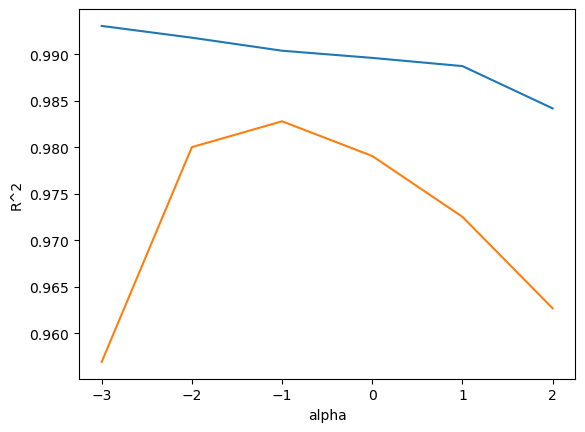

In [108]:
# alpha 값을 10배씩 늘렸기 때문에 그대로 그래프를 그리면 그래프 왼쪽이 촘촘해짐
# alpha 값에 따라 동일한 간격으로 나타내기 위해 로그 함수로 바꾸어 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [110]:
# 적절한 모델 값은 -1, 10의 -1승 = 0.1
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)

Ridge(alpha=0.1)

In [112]:
ridge.score(train_scaled, train_target)

0.9903815817570368

In [114]:
ridge.score(test_scaled, test_target)

0.9827976465386896

#### 라쏘 회귀

In [116]:
from sklearn.linear_model import Lasso

In [118]:
lasso = Lasso()

In [120]:
lasso.fit(train_scaled, train_target)

Lasso()

In [122]:
lasso.score(train_scaled, train_target)

0.989789897208096

In [124]:
lasso.score(test_scaled, test_target)

0.9800593698421884

In [130]:
train_score = []
test_score = []

In [134]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] 
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha, max_iter = 100000) # 반복횟수 늘리기
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.440e+03, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


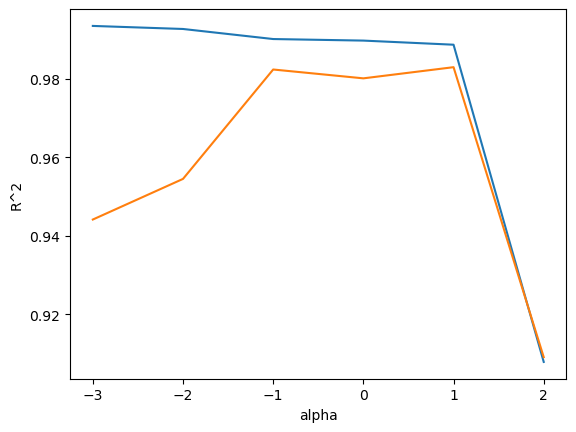

In [136]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [138]:
# 적절한 모델 값은 1, 10의 1승 = 10
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)

Lasso(alpha=10)

In [140]:
lasso.score(train_scaled, train_target)

0.9888067471131867

In [142]:
lasso.score(test_scaled, test_target)

0.9824470598706695